In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

In [2]:
team =pd.read_excel('D:/IPL/IPL Data/Team.xlsx')
season =pd.read_excel('D:/IPL/IPL Data/Season.xlsx')
player_match=pd.read_excel('D:/IPL/IPL Data/Player_match.xlsx')
player = pd.read_excel('D:/IPL/IPL Data/Player.xlsx')
match=pd.read_excel('D:/IPL/IPL Data/Match.xlsx')
ball_by_ball =pd.read_excel('D:/IPL/IPL Data/Ball_by_Ball.xlsx')

In [3]:
ball_by_ball.dtypes

Match_Id                     int64
Season_Id                    int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored               int64
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

#### 

In [4]:
# lest change the data type of columns
cols= [col for col in ball_by_ball.columns if col not in['Batsman_Scored','Extra_Runs']]
ball_by_ball[cols]=ball_by_ball[cols].apply(lambda x: x.astype('category'))
ball_by_ball.dtypes

Match_Id                    category
Season_Id                   category
Innings_Id                  category
Over_Id                     category
Ball_Id                     category
Team_Batting_Id             category
Team_Bowling_Id             category
Striker_Id                  category
Striker_Batting_Position    category
Non_Striker_Id              category
Bowler_Id                   category
Batsman_Scored                 int64
Extra_Type                  category
Extra_Runs                    object
Player_dissimal_Id          category
Dissimal_Type               category
Fielder_Id                  category
dtype: object

 ## Bar Chart-if we have to compare the different lavel of categorical variable

In [5]:
# Univariate Analysis - PS 1: Is team batting first scoring more or team batting 2nd score  more
Runs_by_innings= ball_by_ball.groupby('Innings_Id')['Batsman_Scored'].sum().reset_index().sort_values(by='Batsman_Scored')
Runs_by_innings

,Innings_Id,Batsman_Scored
3,4,70
2,3,80
1,2,78989
0,1,86811


In [6]:
# Actually Innings Id # and 4 refers to innings 1st and 2nd in super over match

First_Innings_runs=Runs_by_innings[(Runs_by_innings['Innings_Id']==1) | (Runs_by_innings['Innings_Id']==3)]['Batsman_Scored'].sum()
First_Innings_runs
Second_innings_runs=Runs_by_innings[(Runs_by_innings["Innings_Id"]==2) | (Runs_by_innings['Innings_Id']==4)]['Batsman_Scored'].sum()
Second_innings_runs

79059

In [7]:
# lets create the list for two columns
Innings=['First_inning','Second_innings']
Runs=[First_Innings_runs,Second_innings_runs]
Final_data=pd.DataFrame()
Final_data['Innings']=Innings
Final_data['Runs']= Runs
Final_data

,Innings,Runs
0,First_inning,86891
1,Second_innings,79059


Text(0.5, 1.0, 'Inning wise runs in IPL')

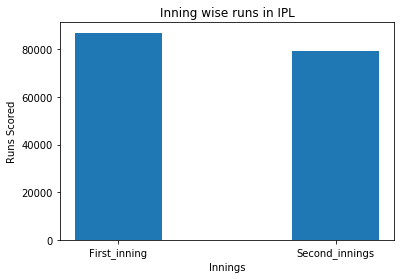

In [8]:
# ploting bar chat (when we have catagorical variables)

plt.bar(Final_data['Innings'],Final_data['Runs'],width=0.4)
plt.xlabel('Innings')
plt.ylabel('Runs Scored')
plt.title('Inning wise runs in IPL')

# Univariate Analysis - Composition
Lest say we want to check the what teams are deciding after winning the toss

In [9]:
Toss_decision = match.groupby(['Toss_Decision']).size().reset_index()
Toss_decision

,Toss_Decision,0
0,bat,262
1,field,315


In [10]:
#lets remane the columns
Toss_decision= Toss_decision.rename(columns={0: 'Number of Matches'})
Toss_decision

,Toss_Decision,Number of Matches
0,bat,262
1,field,315


([<matplotlib.patches.Wedge at 0x257c21fc0f0>,
 [Text(0.15816288920892965, 1.0885699336639258, 'bat'),
  Text(-0.1581627872896562, -1.0885699484721996, 'field')],
 [Text(0.10064911131477342, 0.6927263214224982, '45.41%'),
  Text(-0.10064904645705393, -0.692726330845945, '54.59%')])

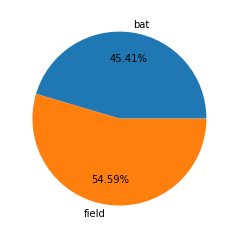

In [11]:
# we can respresnt the same by a pia chart
plt.pie(Toss_decision['Number of Matches'],labels=Toss_decision['Toss_Decision'], autopct='%.2f%%', pctdistance=0.7)

([<matplotlib.patches.Wedge at 0x257c294a320>,
 [Text(0.1725413336824687, 1.1875308367242827, 'bat'),
  Text(-0.1581627872896562, -1.0885699484721996, 'field')],
 [Text(0.11502755578831247, 0.7916872244828551, '45.41%'),
  Text(-0.10064904645705393, -0.692726330845945, '54.59%')])

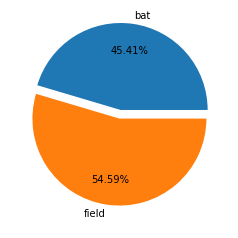

In [12]:
plt.pie(Toss_decision['Number of Matches'],labels=Toss_decision['Toss_Decision'], autopct='%.2f%%', explode=(.1,0),pctdistance=0.7)

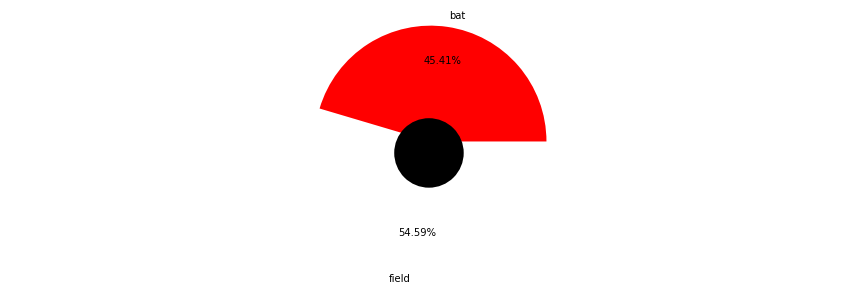

In [74]:
#can also create a donut chart from this
plt.pie(Toss_decision['Number of Matches'],labels=Toss_decision['Toss_Decision'], autopct='%.2f%%',colors=('Red','white'), explode=(.1,0),pctdistance=0.7)
centre_circle=plt.Circle((0,0),.3,fc='black')
## gcf - get current fig 
## gca - get current axis
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

In [14]:
?plt.pie

In [15]:
data=pd.read_csv('Automobile_data.csv')

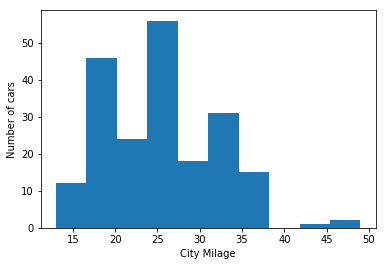

In [16]:
# Lets check if the city milage and highway milage is normal distributed
# let first check overall city milage and the highwaymilage
# city milage distribution
plt.hist(data['city-mpg'])
plt.xlabel('City Milage')
plt.ylabel('Number of cars')
plt.show()

Text(0.5, 0, 'Highway Milage')

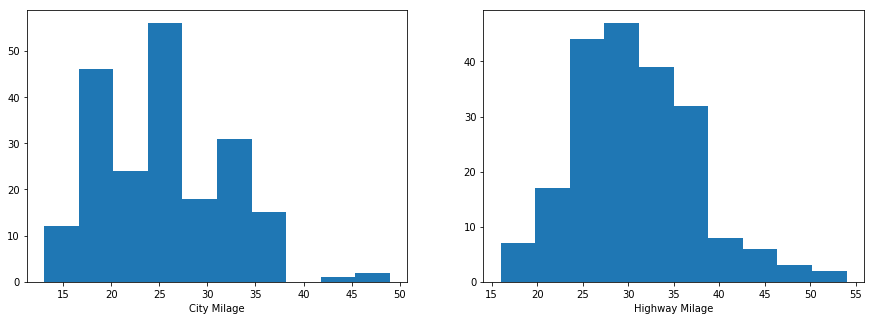

In [17]:
# in case if you want to plot both city and highwaymilage side by side

plt.rcParams['figure.figsize'] =[15,5]
fig = plt.figure()

#plt.subplot(row,cols, for which you are drawing this)
plt.subplot(1,2,1)
plt.hist(data['city-mpg'])
plt.xlabel('City Milage')

plt.subplot(1,2,2)
plt.hist(data['highway-mpg'])
plt.xlabel('Highway Milage')


In [18]:
import seaborn as sns

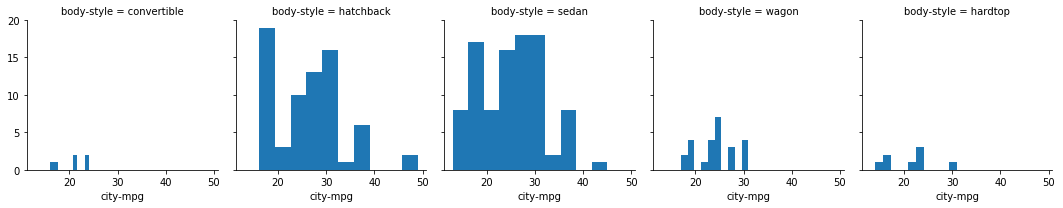

In [19]:
g=sns.FacetGrid(data,col='body-style')
g=g.map(plt.hist,'city-mpg')
plt.show()

In [20]:
#now that we have seen that the city milage and highway milege
data.skew()

symboling            0.211072
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
compression-ratio    2.610862
city-mpg             0.663704
highway-mpg          0.539997
dtype: float64

In [21]:
## to deal with skewness are apply transformation on data

In [22]:
#skewness treatment
import numpy as np

In [23]:
data ['cty_log']=np.log(data['city-mpg'])
data['cty_sqrt']= np.sqrt(data['city-mpg'])
data.skew()

symboling            0.211072
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
compression-ratio    2.610862
city-mpg             0.663704
highway-mpg          0.539997
cty_log              0.003106
cty_sqrt             0.316761
dtype: float64

skewness
to reduce right skewness take root or logarithams or reciprocals (roots are weakest)
to reduce left skewness take squares or cubes or high powers

In [24]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cty_log,cty_sqrt
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,3.044522,4.582576
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,3.044522,4.582576
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,2.944439,4.358899
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102,5500,24,30,13950,3.178054,4.898979
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115,5500,18,22,17450,2.890372,4.242641


In [25]:
# out layer find
data['city-mpg'].describe()


count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

In [26]:
iqr=30-19
upper_bound=30+1.5*iqr
lower_bound=19-1.5*iqr
data[data['city-mpg']>upper_bound].head()
#print(data[data['city-mpg']<lower_bound])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cty_log,cty_sqrt
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,2.91,3.03,9.5,48,5100,47,53,5151,3.850148,6.855655
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,2.91,3.41,9.6,58,4800,49,54,6479,3.891820,7.000000


In [27]:
data['Outlier']=np.where((data['city-mpg']>upper_bound)|(data['city-mpg']<lower_bound),'Outlier','Safe')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cty_log,cty_sqrt,Outlier
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,3.044522,4.582576,Safe
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,3.044522,4.582576,Safe
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,2.944439,4.358899,Safe
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.4,10.0,102,5500,24,30,13950,3.178054,4.898979,Safe
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.4,8.0,115,5500,18,22,17450,2.890372,4.242641,Safe


In [28]:
data[data['Outlier']=='Outlier']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cty_log,cty_sqrt,Outlier
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,3.03,9.5,48,5100,47,53,5151,3.850148,6.855655,Outlier
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,3.41,9.6,58,4800,49,54,6479,3.891820,7.000000,Outlier


In [29]:
# creating cross table of outlier
out_table=pd.crosstab(index=data['Outlier'],columns='No. of Cars').reset_index()
out_table

col_0,Outlier,No. of Cars
0,Outlier,2
1,Safe,203


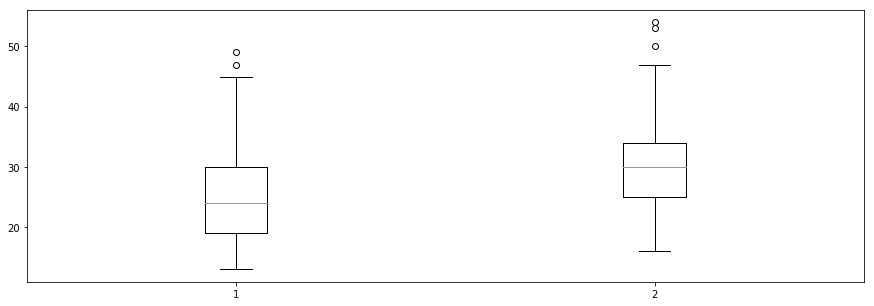

In [30]:
x=data[['city-mpg','highway-mpg']].values
plt.boxplot(x)
plt.show()

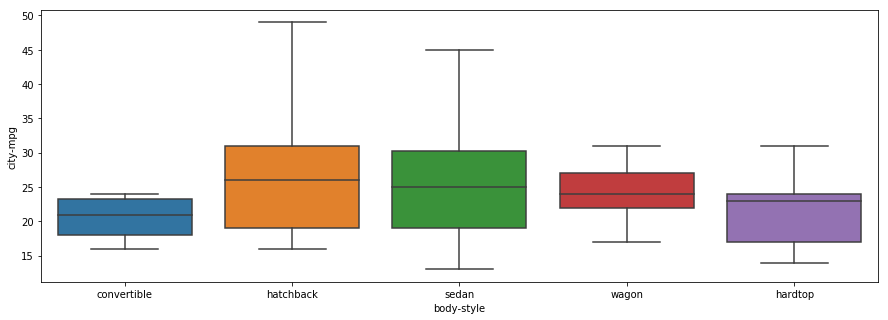

In [31]:
import seaborn as sns
sns.boxplot(data=data,x='body-style',y='city-mpg')
plt.show()

In [35]:
 ## while doing boxplot in seaborn we can specify the order also
order = ['hatchback','sedan', 'hardtop', 'wagon', 'convertible']
sns.boxplot(df =data , x= 'body', y='city-mpg', order= order)
plt.show()

ValueError: Could not interpret input 'body'

# Out Lier treatment
1. Removing : Create a new data set by removing the outlier from each class
2. Capping : create a new data set by capping the outlier equal to the upper limit or lower limit of each class

In [36]:
data['city-mpg'].replace(data.city-mpg>47,47,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'city'

In [37]:
data["city-mpg"] = np.where(data["city-mpg"] >46,44,data['city-mpg'])

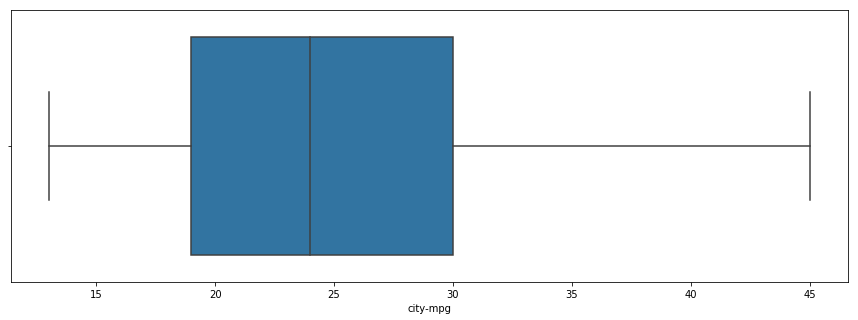

In [38]:
sns.boxplot((data['city-mpg']))

In [ ]:
data.head(20)

In [39]:
#removing outlier with upper boundARY
data['city-mpg'].clip_upper(upper_bound)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  


0      21
1      21
2      19
3      24
4      18
5      19
6      19
7      19
8      17
9      16
10     23
11     23
12     21
13     21
14     20
15     16
16     16
17     15
18     44
19     38
20     38
21     37
22     31
23     24
24     31
25     31
26     31
27     24
28     24
29     19
       ..
175    27
176    27
177    27
178    20
179    19
180    20
181    19
182    37
183    27
184    37
185    27
186    27
187    37
188    26
189    24
190    24
191    19
192    33
193    25
194    23
195    23
196    24
197    24
198    17
199    17
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [40]:
startup_data=pd.read_csv('50_Startups.csv')

In [41]:
startup_data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [ ]:
?pd.get_dummies

In [42]:
#get_dummies
x=pd.get_dummies(startup_data,prefix=['State'])
x.head(4)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1


In [43]:
# lebel Encoder
from sklearn.preprocessing import LabelEncoder

In [44]:
x1=LabelEncoder()
startup_data['State']=x1.fit_transform(startup_data['State'])
startup_data.head(4)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99


In [45]:
x1=LabelEncoder()
startup_data['State1']=x1.fit_transform(startup_data['State'])
startup_data.head(4)

,R&D Spend,Administration,Marketing Spend,State,Profit,State1
0,165349.20,136897.80,471784.10,2,192261.83,2
1,162597.70,151377.59,443898.53,0,191792.06,0
2,153441.51,101145.55,407934.54,1,191050.39,1
3,144372.41,118671.85,383199.62,2,182901.99,2


### Relationship analysis -Scatter plot
#### want to understand what kind of relation exist between city mlage and highway milage 
# Numerial column vs numerical column:analyis 
#### 1) realtionship ananlysis-corelation matrix and plot
###### 2) corelation ananlysis- corelation matrix and plot 
###### 3) regression ananlysis-simple linear regression (slm)



In [46]:
car=pd.read_csv('mpg.csv')
car.head(2)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


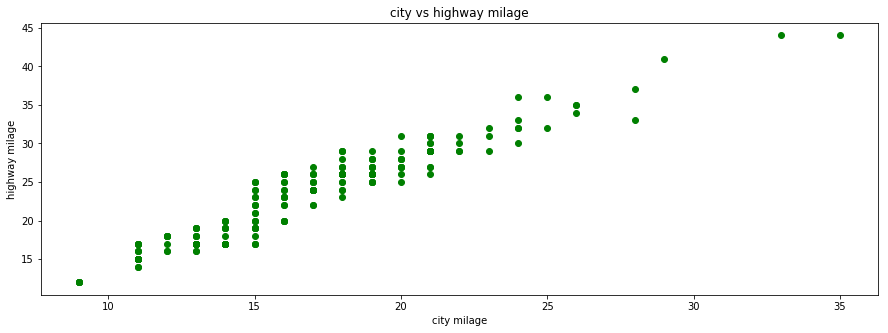

In [47]:
import matplotlib.pyplot as plt
plt.scatter(car['cty'],car['hwy'],color='green')
plt.xlabel('city milage')
plt.ylabel('highway milage')
plt.title('city vs highway milage')
plt.show()

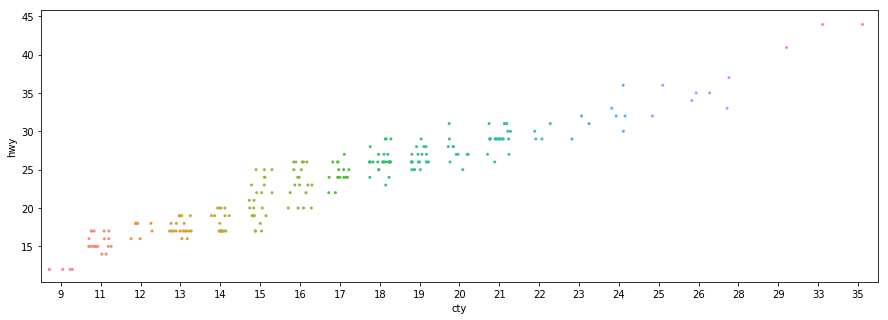

In [48]:
# we can see that not much variation between city and highway milage
#if we try plotting the same using scatter plot
# we will get the overlapping of data points,
# one way to avoid the same is to use jitter plot
import seaborn as sns 
sns.stripplot(car['cty'],car['hwy'],jitter=0.3,size=3)
plt.show()

this shows that city and highway milage have a linear relationship which means changing one variable ,
the other will also change linearly.
the direction of relation is also seems to be positive.
Note: some time during your numerical vs numerical bivariate ananlysis,
you may want to check the re`lationship between one numerical
vs other numerical columns

In [49]:
# Creating a correlation matrix
matrix=car.corr()
matrix

,Unnamed: 0,displ,year,cyl,cty,hwy
Unnamed: 0,1.000000,-0.402459,-0.073577,-0.407698,0.401822,0.327046
displ,-0.402459,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,-0.073577,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,-0.407698,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,0.401822,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,0.327046,-0.766020,0.002158,-0.761912,0.955916,1.000000


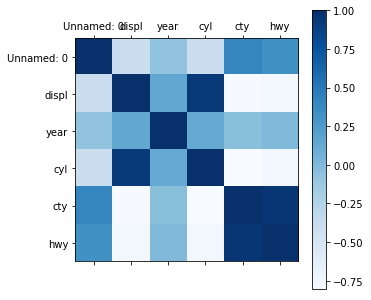

In [50]:
# Plotting the correltion matrix using matshow
# cmap will hepl you to give a specific color to the matrix
from matplotlib import pyplot as plt
plt.matshow(matrix,cmap='Blues')
# labeling the xticks and yticks
plt.xticks(range(len(matrix.columns)),matrix.columns)
plt.yticks(range(len(matrix.columns)),matrix.columns)
# using the color bar to reference the color 
plt.colorbar()
plt.show()

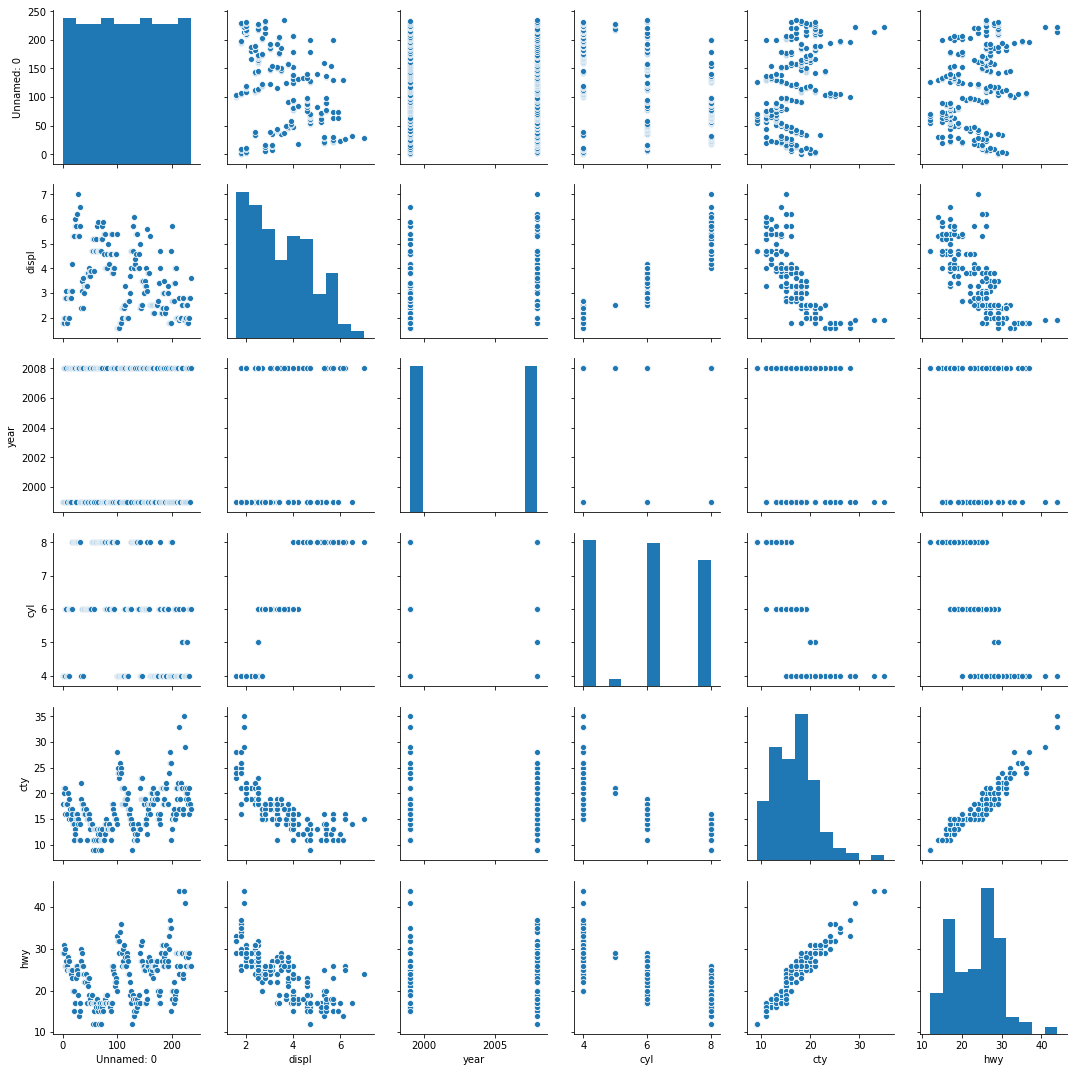

In [51]:
sns.pairplot(car)
plt.show()

In [52]:
feature=car.columns.difference(['hwy'])
feature

Index(['Unnamed: 0', 'class', 'cty', 'cyl', 'displ', 'drv', 'fl',
       'manufacturer', 'model', 'trans', 'year'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(car,test_size=.2,random_state=123)

In [55]:
import statsmodels.formula.api as smf
lm=smf.ols('hwy~cty',train).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2147.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          9.64e-104
Time:                        11:33:49   Log-Likelihood:                -367.76
No. Observations:                 187   AIC:                             739.5
Df Residuals:                     185   BIC:                             746.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1689      0.505      2.315      0.022       0.173       2.165
cty            1.3270      0.029     46.336      0.000       1.270       1.383
==============================================================================
Omnibus:                        0.764   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.530
Skew:                           0.120   Prob(JB):                        0.767
Kurtosis:                       3.102   Cond. No.                         70.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
 ## Simple Linear Regression : To find the line of best fit and predict numerical data

### Regression : attempts to predict one dependent variable (usually denoted by Y) and a series of other changing variables, known as independent variable, denoted by X
### Linear Regression : way of predicting a response Y on the basis of a single predictor variable X. Our assumption is that there is a approx linear relationship between X and Y. This means that we can express X/Y in terms of Y/X
- Our objective is to predict the highway mileage when the city mileage is given
- X axis : city mileage column : Independent variable : predictor
- Y axis : highway mileage column : Dependent Variable : predicted


SyntaxError: invalid syntax (<ipython-input-57-aebd5d906a6e>, line 5)

In [58]:
## Predicting numerical value in machine learning, then technique used is regression
## Classifying as Yes or No in machine learning, then technique used is Classification

## While building model we should know X and Y

## Difference between actual values and predicted value is the error rate of our machine model

# import pandas as pd
# import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression


In [ ]:
## For understanding purpose we are creating the model using the entire data, we genenerally dont do that
## We use 80% data for training and 20% for testing

In [59]:
## Step 1 : Creating a linear regression object
lm = LinearRegression()


In [60]:
## Step 2 : Taking only the city mileage(X) and highway mileage (Y) column
X = car[['cty']] #Independent variable : passed as DF
Y = car[['hwy']] #Dependent variable which we are trying to predict : passed as DF


In [61]:
## Step 3 : Fitting the model
model1 = lm.fit(X,Y)
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
## Thus the linear equation is Y = 1.33745561*X + 0.8920411

## Lets predict the highway mileage if the city mileage is 26, this is we are giving just like that because we have noting to
## give for testing
## the predict() function takes DF as input


In [62]:
val_data = pd.DataFrame.from_dict({'cty':[26]})  ## we are giving dict type data that is why we gave from_dict : diff way 

## Predicting the highway mileage

pred_highway_mileage = model1.predict(val_data)

pred_highway_mileage


array([[35.66588697]])

In [ ]:
## Actual model building is a 4 step process
### 1 -> Split the Data into Testing and Training data
### 2 -> Train the model on training data
### 3 -> Test model on testing data 
### 4 -> Predict the model on validation data : This step deprecated, no longer used

## Lets split the data into training and test in the ration of 80:20


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)
## test_size = 0.2 that means keep 20% data for texting and remaining 80% for training
len(X_train), len(X_test), len(Y_train), len(Y_test)

(210, 24, 210, 24)

In [64]:
## Build a linear regression model using training data sets

lm1 = LinearRegression()

model2 = lm1.fit(X_train,Y_train)
model2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
model2.intercept_

array([0.92275234])

In [66]:
model2.coef_

array([[1.33670792]])

In [67]:

## Testing the model on test data and storing it in a new column

Y_test['hwy_Pred'] = model2.predict(X_test)
round(Y_test,2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,hwy,hwy_Pred
143,31,31.67
162,25,26.32
220,24,23.65
31,17,19.64
48,19,20.97
164,23,24.98
44,22,20.97
154,26,24.98
206,20,22.31
216,29,28.99


In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
mean_squared_error(Y_test['hwy'],Y_test['hwy_Pred'])

2.39880175689955

##### import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

### Univariance text analysis